Kelayakan Kredit: 68.79


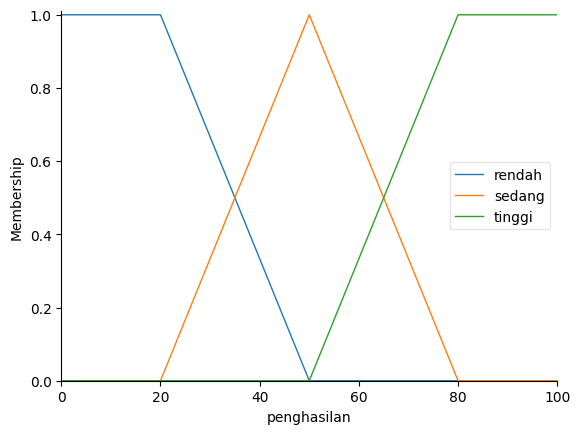

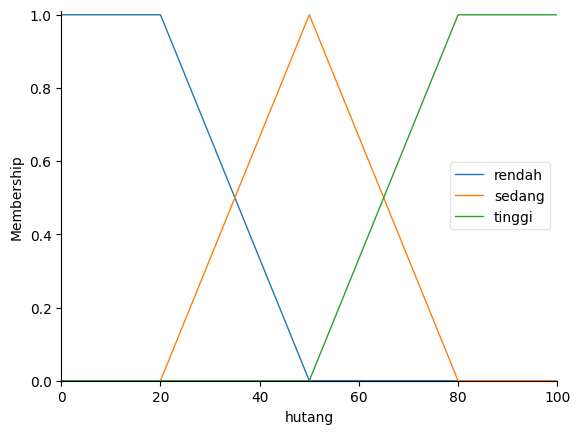

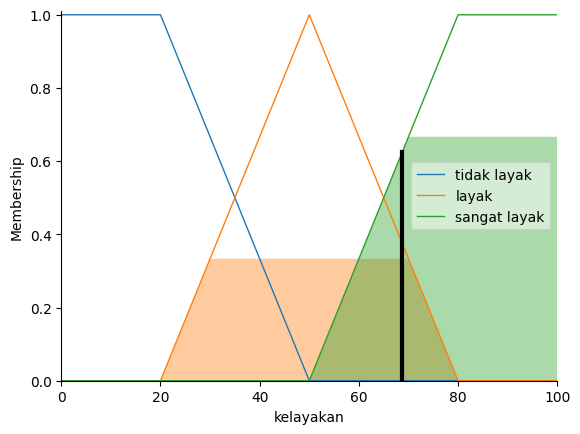

In [2]:
# 1.Sistem Penilaian Kelayakan Kredit
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define fuzzy variables
penghasilan = ctrl.Antecedent(np.arange(0, 101, 1), 'penghasilan')
hutang = ctrl.Antecedent(np.arange(0, 101, 1), 'hutang')
kelayakan = ctrl.Consequent(np.arange(0, 101, 1), 'kelayakan')

# Membership functions for "penghasilan"
penghasilan['rendah'] = fuzz.trapmf(penghasilan.universe, [0, 0, 20, 50])
penghasilan['sedang'] = fuzz.trimf(penghasilan.universe, [20, 50, 80])
penghasilan['tinggi'] = fuzz.trapmf(penghasilan.universe, [50, 80, 100, 100])

# Membership functions for "hutang"
hutang['rendah'] = fuzz.trapmf(hutang.universe, [0, 0, 20, 50])
hutang['sedang'] = fuzz.trimf(hutang.universe, [20, 50, 80])
hutang['tinggi'] = fuzz.trapmf(hutang.universe, [50, 80, 100, 100])

# Membership functions for "kelayakan"
kelayakan['tidak layak'] = fuzz.trapmf(kelayakan.universe, [0, 0, 20, 50])
kelayakan['layak'] = fuzz.trimf(kelayakan.universe, [20, 50, 80])
kelayakan['sangat layak'] = fuzz.trapmf(kelayakan.universe, [50, 80, 100, 100])

# Define fuzzy rules
rule1 = ctrl.Rule(penghasilan['rendah'] & hutang['tinggi'], kelayakan['tidak layak'])
rule2 = ctrl.Rule(penghasilan['sedang'] & hutang['rendah'], kelayakan['layak'])
rule3 = ctrl.Rule(penghasilan['tinggi'] & hutang['rendah'], kelayakan['sangat layak'])

# Create control system
kelayakan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
kelayakan_simulasi = ctrl.ControlSystemSimulation(kelayakan_ctrl)

# Input values
kelayakan_simulasi.input['penghasilan'] = 70  # Contoh input penghasilan
kelayakan_simulasi.input['hutang'] = 30      # Contoh input hutang

# Compute the output
kelayakan_simulasi.compute()
print(f"Kelayakan Kredit: {kelayakan_simulasi.output['kelayakan']:.2f}")

# Visualize the results
penghasilan.view()
hutang.view()
kelayakan.view(sim=kelayakan_simulasi)


Kelayakan Kredit: 1.67
Keputusan: Tidak Layak


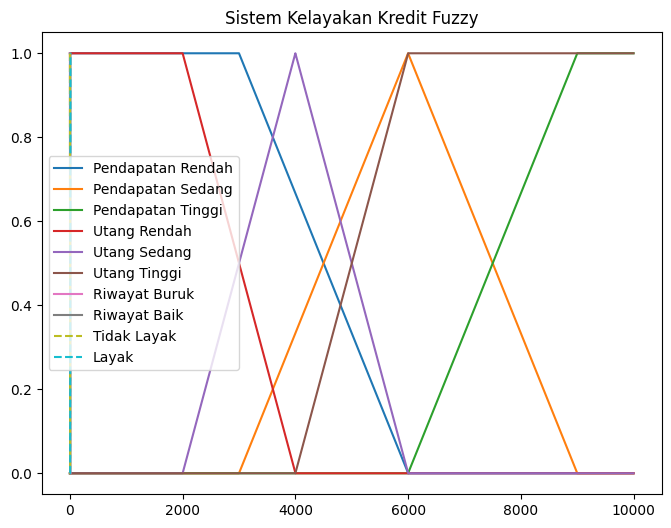

In [6]:
# 2.Buat sistem untuk menentukan kelayakan kredit berdasarkan parameter seperti pendapatan bulanan, utang, dan riwayat kredit.
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# 1. Definisikan variabel fuzzy

# Pendapatan Bulanan
income = np.arange(0, 10001, 1)  # 0 sampai 10000
income_low = fuzz.trapmf(income, [0, 0, 3000, 6000])  # Rendah
income_medium = fuzz.trimf(income, [3000, 6000, 9000])  # Sedang
income_high = fuzz.trapmf(income, [6000, 9000, 10000, 10000])  # Tinggi

# Utang
debt = np.arange(0, 10001, 1)  # 0 sampai 10000
debt_low = fuzz.trapmf(debt, [0, 0, 2000, 4000])  # Rendah
debt_medium = fuzz.trimf(debt, [2000, 4000, 6000])  # Sedang
debt_high = fuzz.trapmf(debt, [4000, 6000, 10000, 10000])  # Tinggi

# Riwayat Kredit
credit_history = np.arange(0, 11, 1)  # 0 sampai 10 (0 = Buruk, 10 = Baik)
credit_bad = fuzz.trimf(credit_history, [0, 0, 5])  # Buruk
credit_good = fuzz.trimf(credit_history, [5, 10, 10])  # Baik

# 2. Definisikan output fuzzy (kelayakan kredit)
creditworthiness = np.arange(0, 11, 1)  # 0 = Tidak Layak, 10 = Layak
not_eligible = fuzz.trimf(creditworthiness, [0, 0, 5])  # Tidak Layak
eligible = fuzz.trimf(creditworthiness, [5, 10, 10])  # Layak

# 3. Interpolasi untuk kesesuaian dimensi
credit_good_interp = np.interp(income, credit_history, credit_good)  # Interpolasi untuk credit_good
credit_bad_interp = np.interp(income, credit_history, credit_bad)  # Interpolasi untuk credit_bad

# 4. Inferensi Fuzzy (Aturan)
# Rule 1: Jika pendapatan rendah dan utang tinggi, maka kelayakan kredit rendah
rule1 = np.fmin(income_low, debt_high)

# Rule 2: Jika pendapatan tinggi dan riwayat kredit baik, maka kelayakan kredit tinggi
rule2 = np.fmin(income_high, credit_good_interp)

# Rule 3: Jika pendapatan sedang dan utang sedang, maka kelayakan kredit sedang
rule3 = np.fmin(income_medium, debt_medium)

# Rule 4: Jika riwayat kredit buruk, maka kelayakan kredit rendah
rule4 = credit_bad_interp

# 5. Kombinasikan aturan-aturan (Mamdani Implication)
aggregated = np.fmax(rule1, np.fmax(rule2, np.fmax(rule3, rule4)))

# 6. Interpolasi hasil penggabungan aturan agar sesuai dengan dimensi 'creditworthiness'
aggregated_interp = np.interp(creditworthiness, income, aggregated)

# 7. Defuzzifikasi
credit_result = fuzz.defuzz(creditworthiness, aggregated_interp, 'centroid')
credit_result_membership = fuzz.interp_membership(creditworthiness, aggregated_interp, credit_result)

# 8. Output hasil
print(f"Kelayakan Kredit: {credit_result:.2f}")
if credit_result > 5:
    print("Keputusan: Layak")
else:
    print("Keputusan: Tidak Layak")

# Plot hasil
fig, ax = plt.subplots(figsize=(8, 6))

# Plotkan semua fungsi keanggotaan
ax.plot(income, income_low, label='Pendapatan Rendah')
ax.plot(income, income_medium, label='Pendapatan Sedang')
ax.plot(income, income_high, label='Pendapatan Tinggi')

ax.plot(debt, debt_low, label='Utang Rendah')
ax.plot(debt, debt_medium, label='Utang Sedang')
ax.plot(debt, debt_high, label='Utang Tinggi')

ax.plot(credit_history, credit_bad, label='Riwayat Buruk')
ax.plot(credit_history, credit_good, label='Riwayat Baik')

ax.plot(creditworthiness, not_eligible, label='Tidak Layak', linestyle='--')
ax.plot(creditworthiness, eligible, label='Layak', linestyle='--')

ax.fill_between(creditworthiness, 0, aggregated_interp, color='gray', alpha=0.5)

ax.set_title('Sistem Kelayakan Kredit Fuzzy')
ax.legend()

plt.show()
